### Run the following script to import any libraries or packages required for the rest of the script.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import random as rn

### Run the following script to generate an r-squared plot which compares aggregated automated counts to aggregated manual counts.

The user will need to adjust the base_Directory variable and pay careful attention to the directory structure.

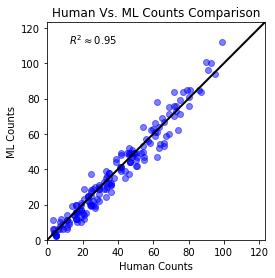

In [24]:
base_Directory = ""

manual_Document = pd.read_csv(base_Directory + "Analysis/Manual_Counts/Counts.csv").sort_values("File Name", ignore_index = True)
automated_Document = pd.read_csv(base_Directory + "Analysis/Automated_Counts/Counts.csv").sort_values("File Name",ignore_index = True)

number_Of_Frames = len(automated_Document)
frames_Per_Grouping = int(np.floor(number_Of_Frames/(10+9+8+7+6+5+4+3+2+1)))
files = [file_Name for file_Name in automated_Document["File Name"]]
groupings = []
for i in np.arange(10,0,-1):
    for j in range(frames_Per_Grouping):
        group = []
        for k in range(i):
            random_File = rn.choice(files)
            group.append(random_File)
            files = np.delete(files, np.where(files == random_File))
        groupings.append(group)
        
automated_Counts = []
manual_Counts = []
for group in groupings:
    automated_Sum = 0
    manual_Sum = 0
    for frame in group:
        automated_Sum += automated_Document[automated_Document["File Name"] == frame]["Counts"].iloc[0]
        manual_Sum += manual_Document[manual_Document["File Name"] == frame]["Counts"].iloc[0]
    automated_Counts.append(automated_Sum)
    manual_Counts.append(manual_Sum)

limit = np.max((np.max(automated_Counts),np.max(manual_Counts)))*1.1

plt.figure()
plt.gca().set_aspect('equal')
line_Values = np.linspace(0,limit,1001)
plt.scatter(manual_Counts,automated_Counts, color = "blue", alpha = 0.5)
plt.xlim(0,limit)
plt.ylim(0,limit)
plt.plot(line_Values,line_Values, color = "black", lw = "2")
plt.text(limit*0.1,limit*0.9, r'$R^{2} \approx $' + str(np.round(r2_score(manual_Counts,automated_Counts),2)))
plt.title("Human Vs. ML Counts Comparison")
plt.xlabel("Human Counts")
plt.ylabel("ML Counts")
plt.savefig(base_Directory + "Analysis/Outputs/Counts.png")
plt.savefig(base_Directory + "Analysis/Outputs/Counts.svg")
plt.show()